In [ ]:
# Source: http://stackoverflow.com/questions/27868250/python-find-out-how-much-of-an-image-is-black

In [1]:
path = '/Users/lauragraesser/Google Drive/NYU_Courses/SEA-Project/data/biggertest/images'

In [41]:
import os
import sys
from PIL import Image as PImage
import numpy as np

In [42]:
sys.path.insert(0, '/Users/lauragraesser/Google Drive/NYU_Courses/SEA-Project/util')

In [48]:
from image_processing_fns import getImage, convertImageToArray, showImage

In [44]:
im = getImage('100.jpg', path)
data = im.getdata()
print(len(data))
print(data[0])
print(data[1])
print(data[2])
print(data[3])
print()

ima = convertImageToArray(im)
ima = ima.reshape((-1, ima.shape[2]))
print(ima.shape)
print(ima[:4])
print()

ima = np.sum(ima, axis=1)
print(ima.shape)
print(ima[:4])
print()

166500
(0, 0, 2)
(4, 2, 3)
(8, 7, 5)
(13, 12, 8)

(166500, 3)
[[  0.   0.   2.]
 [  4.   2.   3.]
 [  8.   7.   5.]
 [ 13.  12.   8.]]

(166500,)
[  2.   9.  20.  33.]



In [45]:
black = ima < 15
print(black.shape)
print(black[:4])

(166500,)
[ True  True False False]


In [46]:
print(black.sum() / black.shape[0])

0.0184444444444


In [106]:
def is_black(image, threshold=0.9):
    image = convertImageToArray(image)
    try:
        image = image.reshape((-1, image.shape[2]))
    except:
        # greyscale images
        image = image.reshape((-1, 1))
    # sum colour channels
    image = np.sum(image, axis=1)
    black = image < 15
    percent_black = black.sum() / black.shape[0]
    print("Percent black: {0:.4f}".format(percent_black))
    if percent_black > threshold:
        return True
    return False

In [107]:
def test_images(num=20):
    for i in range(num):
        fname = str(np.random.randint(1, 2500)) + '.jpg'
        test_im(fname)
        
def test_im(fname):
    im = getImage(fname, path)
    _ = is_black(im)
    print(_)
    showImage(fname, path)

### Testing random selection

Percent black: 0.0001
False


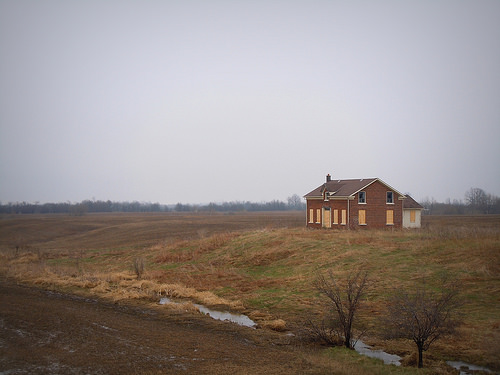

Percent black: 0.0045
False


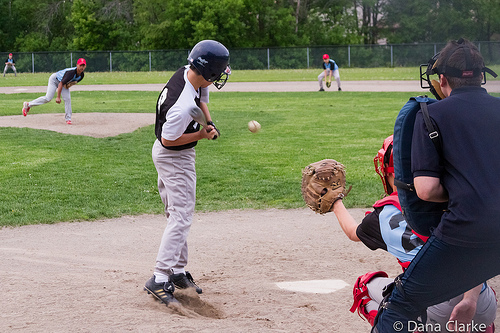

Percent black: 0.0247
False


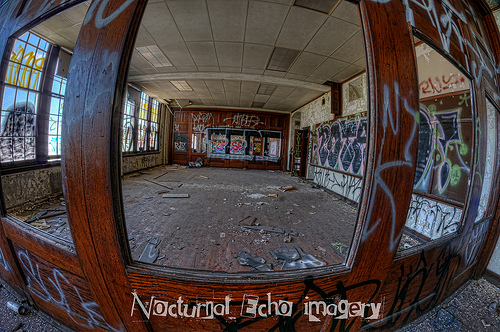

Percent black: 0.0831
False


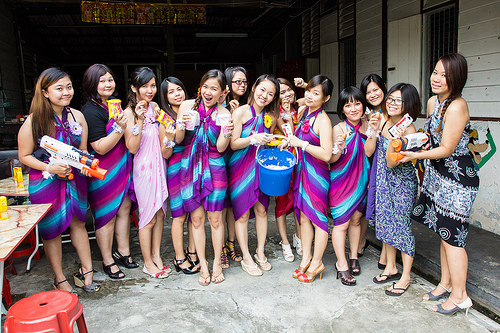

Percent black: 0.0160
False


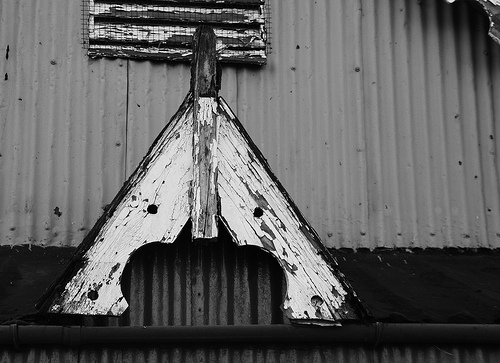

Percent black: 0.0000
False


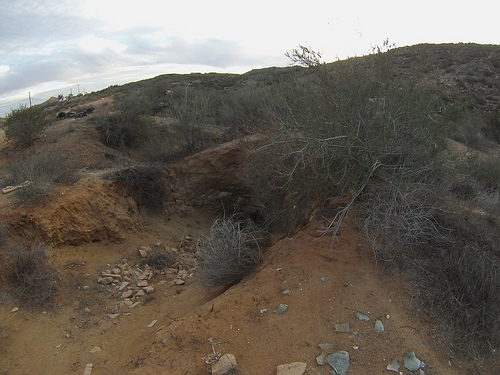

Percent black: 0.0019
False


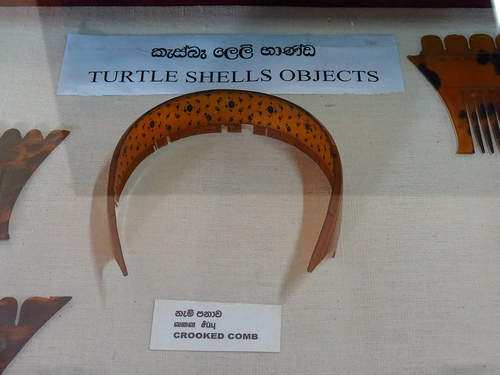

Percent black: 0.0066
False


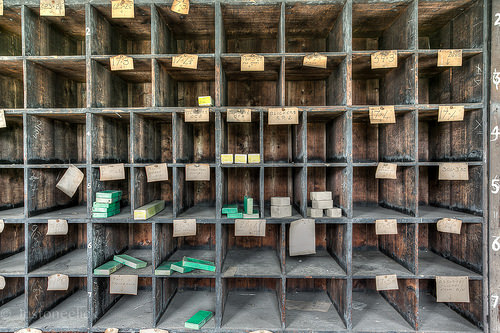

Percent black: 0.0007
False


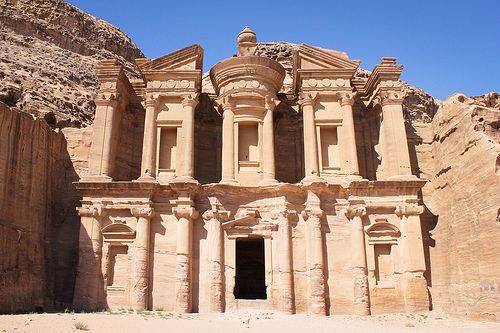

Percent black: 0.0447
False


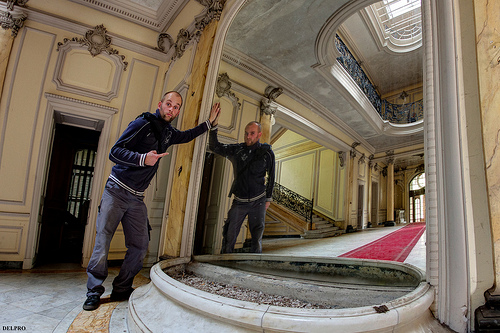

Percent black: 0.0002
False


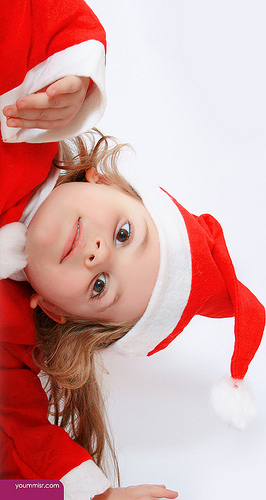

Percent black: 0.6074
False


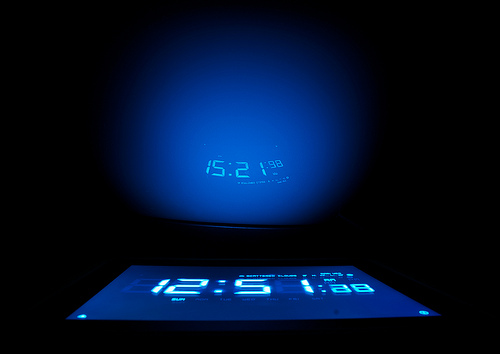

Percent black: 0.0015
False


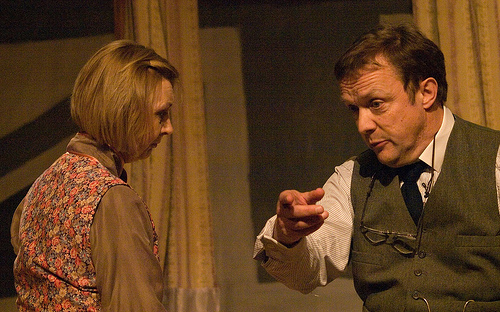

Percent black: 0.0019
False


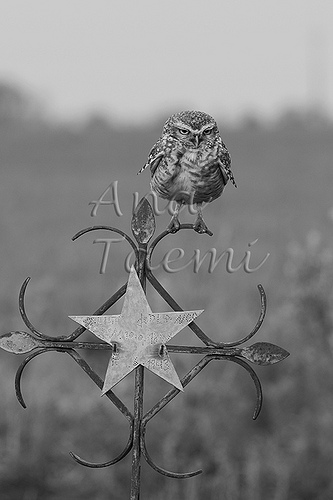

Percent black: 0.1576
False


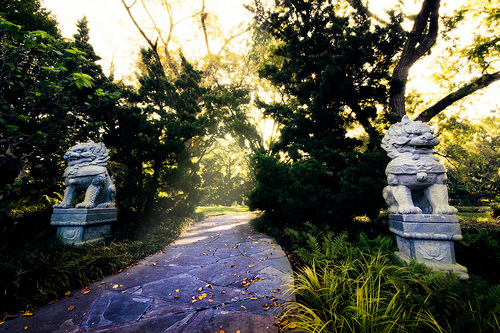

Percent black: 0.0024
False


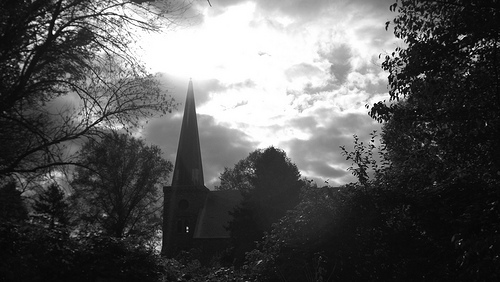

Percent black: 0.0001
False


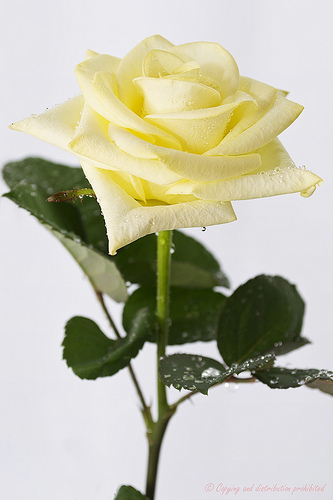

Percent black: 0.0052
False


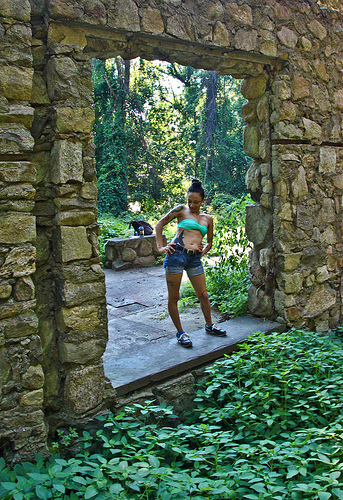

Percent black: 0.0008
False


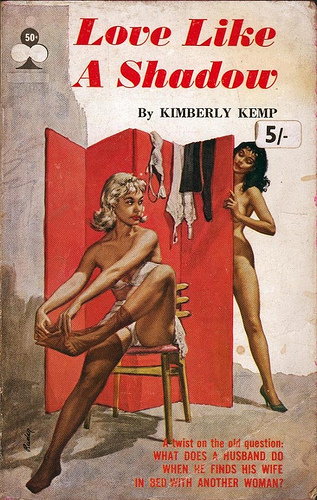

Percent black: 0.0034
False


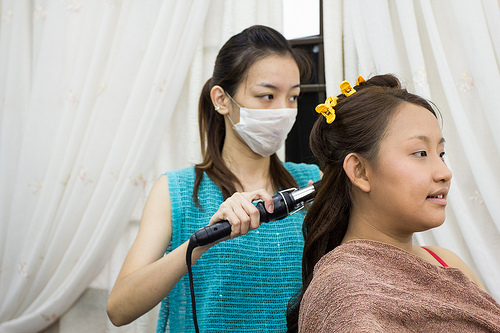

In [108]:
test_images()

### Images that should be black

Percent black: 0.9798
True


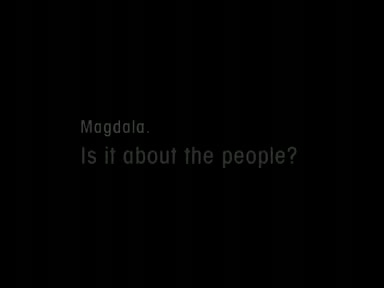

Percent black: 0.9230
True


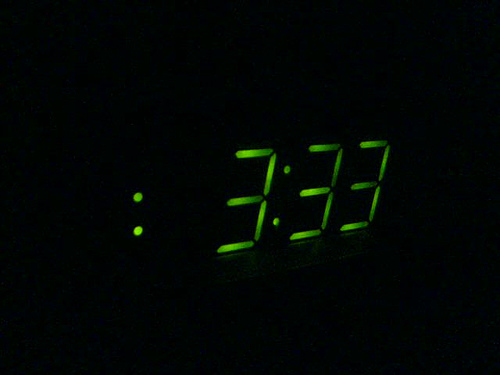

Percent black: 0.9026
True


Percent black: 0.9026
True


In [109]:
ims = [874, 1403, 1924, 1936]

for i in ims:
    fname = str(i) + '.jpg'
    test_im(fname)

### Images that should be close but not black

Percent black: 0.1241
False


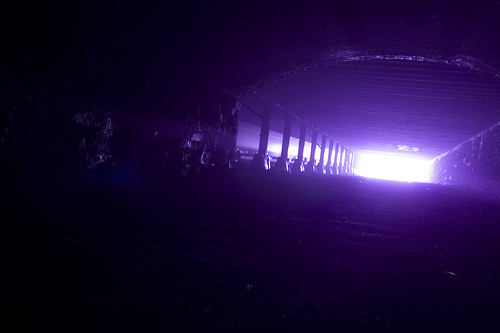

Percent black: 0.5170
False


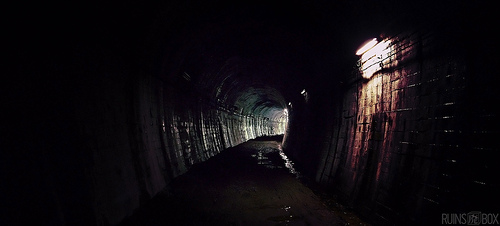

Percent black: 0.1892
False


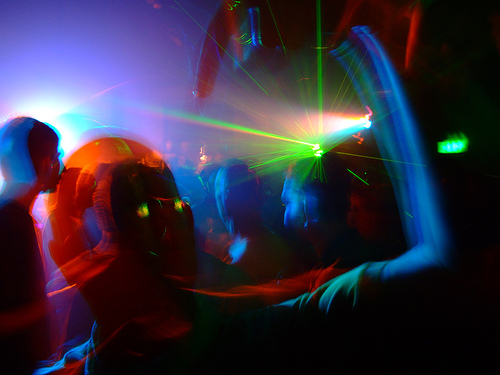

Percent black: 0.8013
False


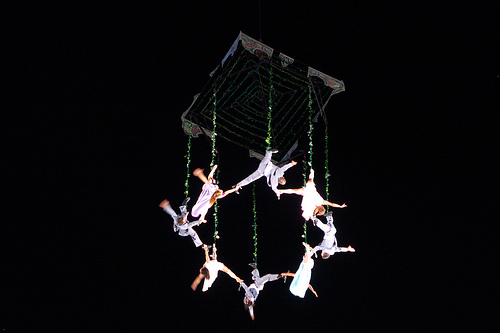

Percent black: 0.8772
False


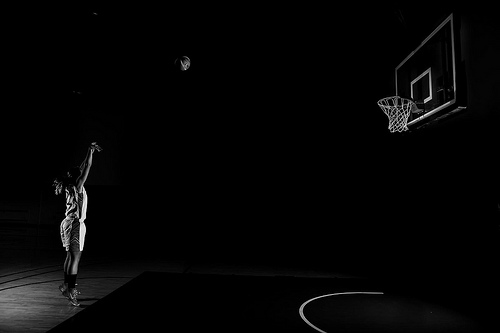

In [110]:
ims = [731, 736, 802, 1322, 1748]

for i in ims:
    fname = str(i) + '.jpg'
    test_im(fname)